In [112]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [113]:
df = pd.read_csv('data/train_processed.csv')

In [114]:
# Normalize the features

feats = list(set(df.columns) - set(['logSalePrice', 'SalePrice']))
df_normalized[feats] = (df[feats] - df[feats].mean()) / df[feats].std()
df_normalized['logSalePrice'] = df['logSalePrice']
df_normalized['SalePrice'] = df['SalePrice']

In [223]:
def train_and_predict(df, feats, target, is_log_transformed=True):
    X_train, X_test, y_train, y_test = train_test_split(
        df[feats], df[target], test_size=0.3, random_state=208)

    lasso_cv = LassoCV(cv=10, random_state=209, alphas=10 ** np.arange(-3.5, -2.0, 0.01))
    lasso_cv.fit(X_train, y_train)

    mse_path_df = pd.DataFrame({
        'alpha': lasso_cv.alphas_,
        'mse': np.mean(lasso_cv.mse_path_, axis=1)
    })

    pred_test = lasso_cv.predict(X_test)
    if is_log_transformed:
        pred_test = np.exp(pred_test)
        y_test = np.exp(y_test)
    
    rmse = np.sqrt(np.mean(np.square(pred_test - y_test)))
    mape = np.mean(np.abs(pred_test - y_test) / y_test)
    
    return {
        'mse_path': mse_path_df,
        'pred_test': pred_test,
        'X_test': X_test,  # return X_test for debugging purpose
        'y_test': y_test,
        'rmse': rmse,
        'mape': mape
    }

In [224]:
res = train_and_predict(df_normalized, feats, 'logSalePrice', is_log_transformed=True)

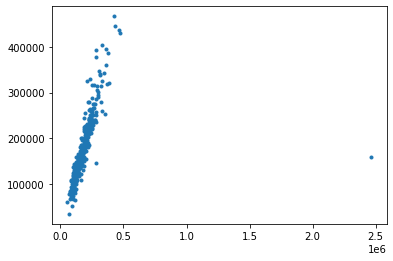

In [225]:
plt.plot(res['pred_test'], res['y_test'], '.')

In [232]:
res['X_test'][res['pred_test'] > 1000000]

,SaleType_ConLD,ExterCond_Fa,RoofStyle_Gable,RoofStyle_Gambrel,LotConfig_FR3,Exterior_VinylSd,HeatingQC_Fa,Heating_OthW,LandSlope_Mod,Exterior_Plywood,...,Fence_Not exist,Neighborhood_SWISU,BsmtQual_Not exist,BsmtUnfSF,TotalBsmtSF,GarageArea,Neighborhood_NridgHt,Neighborhood_NPkVill,GarageQual_Po,MasVnrType_BrkFace
1298,-0.07873,-0.139784,-1.890596,-0.087099,-0.052396,-0.740186,-0.186288,-0.037024,-0.215785,-0.343273,...,0.488031,-0.131946,-0.161194,-0.22912,11.517003,4.420012,-0.235877,-0.07873,-0.045361,-0.661909


In [207]:
# Root Mean Squared Error
res['rmse']

112518.41056607458

In [208]:
# Mean Absolute Percentage Error
res['mape']

0.12468616414839145

Text(0, 0.5, 'MSE')

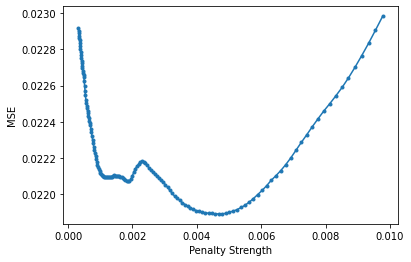

In [210]:
plt.plot(res['mse_path']['alpha'], res['mse_path']['mse'], '.-')
plt.xlabel('Penalty Strength')
plt.ylabel('MSE')